<a href="https://colab.research.google.com/github/ejr271292/Proyecto/blob/main/ProyectoDS_Parte1_Ruiz_Emanuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de producción de biodiesel y venta a petroleras para su posterior corte en gasoil:


**Contexto empresarial:** El presente documento, tiene por fin analizar la producción en toneladas de biodiesel en Argentina.
Toneladas que son vendidas por empresas de distinto tamaño a petroleras para su posterior corte y venta como gasoil.

Actualmente por ley 27.640 de biocombustibles, se establece un corte con biodiesel del 5% para el gasoil.

La fuente utilizada proviene de datos abiertos del gobierno nacional:
https://www.datos.gob.ar/dataset/energia-estadisticas-biodiesel-bioetanol

Posee registros desde febrero del 2010 a febrero del 2024.

Se han agregado columnas respecto de la fuente original, a los fines de poder contar con más variables importantes para analizar.

Para ello, se han obtenido datos de diversas fuentes como el Banco Nación Argentina o la Secretaría de Energía.


**Contexto analítico:** A través del archivo XLS (Excel) obtenemos registros por mes y año referidos a:

*   Las empresas producturas de biodiesel (variable cualitativa)
*   Localidades y provincias donde se llevan a cabo las producciones (variable cualitativa)

*   Cupos asignados de producción a empresas por parte del gobierno (Secretaría de Energía) (variable cuantitativa)
*   Producción en toneladas de biodiesel (variable cuantitativa)

*   Ventas al corte y otras ventas. Cuando nos referimos a otras ventas tiene que ver con subproductos generados en la producción del principal como la glicerina, borra y ácidos grasos (variables cuantitativas)
*   Precio en pesos argentinos por tonelada de biodiesel (variable cuantitativa)

*   Ventas en miles de pesos (variable cuantitativa)  


*   Cotización oficial tipo vendedor de dólar estadounidense (variable cuantitativa)


*   Ventas en dólares estadounideneses (variable cuantitativa)

*   Compras en toneladas de biodiesel por parte de petroleras (variable cuantitativa)
*   Capacidad de producción de litros de gasoil (variable cuantitativa)

Observando y analizando nuestra base de datos, nos surgen las siguientes preguntas:

¿Cuáles son las empresas productoras de biodiesel más importantes?

¿En qué localidades y provincias se llevan a cabo las mayores producciones?

¿Cuáles fueron las medias de cupos, producción y ventas?

¿Qué empresa realizó la mayor producción?

¿Qué empresa tuvo la mayor venta en toneladas?

¿Quén tuvo la mayor venta facturada? ¿Coincide la mayor venta en pesos con la mayor en dólares?

¿Cuáles son las petroleras que realizan las compras de biodiesel? ¿Cuáles son las más importantes?

¿Qué capacidad en litros de gasoil pueden producir las petroleras en base a las compras de toneladas de biodiesel?

Con el fin de poder contestar a las preguntas mencionadas, pondremos en práctica distintas librerías.



In [1]:
#Importamos librerías para manejo, análisis y visualización de estructuras de datos:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Cargamos el dataset (archivo excel):
from google.colab import drive
import os
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
biodiesel_df=pd.read_excel('/content/gdrive/MyDrive/Proyecto Final Data Science 1/Estadisticas-biocombustibles.xls')

In [4]:
#Información del df:
biodiesel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5731 entries, 0 to 5730
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   PERÍODO                                   5731 non-null   datetime64[ns]
 1   PRODUCTORA DE BIODIESEL                   5731 non-null   object        
 2   LOCALIDAD                                 5731 non-null   object        
 3   PROVINCIA                                 5731 non-null   object        
 4   CUPO TOTAL ASIGNADO (TN)                  5407 non-null   float64       
 5   PRODUCCIÓN (TN)                           5727 non-null   float64       
 6   VENTAS AL CORTE (TN)                      5731 non-null   float64       
 7   OTRAS VENTAS (TN)                         5731 non-null   float64       
 8   PRECIO EN $ POR TN DE BIODIESEL           5731 non-null   float64       
 9   VENTAS EN MILES DE $ POR TN DE

Se verifican 3 tipos de datos: datetime64 , object y float64

In [5]:
#Tamaño del df:
biodiesel_df.shape



(5731, 30)

Nuestro dataframe cuenta con 5731 filas o registros y 30 columnas o variables.

In [6]:
#Verifico que tipos de datos tengo para cada variable:
biodiesel_df.dtypes
print('Los datos son de tipo:\n',biodiesel_df.dtypes)

Los datos son de tipo:
 PERÍODO                                     datetime64[ns]
PRODUCTORA DE BIODIESEL                             object
LOCALIDAD                                           object
PROVINCIA                                           object
CUPO TOTAL ASIGNADO (TN)                           float64
PRODUCCIÓN (TN)                                    float64
VENTAS AL CORTE (TN)                               float64
OTRAS VENTAS (TN)                                  float64
PRECIO EN $ POR TN DE BIODIESEL                    float64
VENTAS EN MILES DE $ POR TN DE BIODIESEL           float64
COT. OFICIAL USD                                   float64
VENTAS EN USD POR TN DE BIODIESEL                  float64
AXION ENERGY ARGENTINA S.A.                        float64
DESTILERÍA ARGENTINA DE PETRÓLEO S.A.              float64
PETROBRAS ARGENTINA S.A.                           float64
PETROLERA DEL CONOSUR S.A.                         float64
POLIPETROL S.A.                 

In [7]:
#Columnas del df:
biodiesel_df.columns

Index(['PERÍODO', 'PRODUCTORA DE BIODIESEL', 'LOCALIDAD', 'PROVINCIA',
       'CUPO TOTAL ASIGNADO (TN)', 'PRODUCCIÓN (TN)', 'VENTAS AL CORTE (TN)',
       'OTRAS VENTAS (TN)', 'PRECIO EN $ POR TN DE BIODIESEL',
       'VENTAS EN MILES DE $ POR TN DE BIODIESEL', 'COT. OFICIAL USD ',
       'VENTAS EN USD POR TN DE BIODIESEL', 'AXION ENERGY ARGENTINA S.A.',
       'DESTILERÍA ARGENTINA DE PETRÓLEO S.A.', 'PETROBRAS ARGENTINA S.A.',
       'PETROLERA DEL CONOSUR S.A.', 'POLIPETROL S.A.',
       'REFINERÍA DEL NORTE S.A.', 'SHELL ARGENTINA C.A.P.S.A.', 'YPF S.A.',
       'OIL COMBUSTIBLES S.A.', 'NEW AMERICAN OIL S.A.', 'REFI PAMPA S.A.',
       'TRAFIGURA ARGENTINA S.A.', 'ENERGÍA ARGENTINA S.A. (ENARSA)',
       'ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.', 'PETROIL S.A.',
       'DIVERSE FUELS S.A.', 'PETROLERA DEGAB S.A.',
       'CAP. DE PROD. GASOIL - PETROLERAS (LTS)'],
      dtype='object')

In [8]:
#Definimos un diccionario:
Diccionario = {'PERÍODO' : 'Fechas',
               'PRODUCTORA DE BIODIESEL' : 'Razón social productora',
               'CUPO TOTAL ASIGNADO (TN)' : 'Cupo de producción asignado a cada empresa',
               'PRODUCCIÓN (TN)' : 'Cantidad de tns producidas',
               'VENTAS AL CORTE (TN)' : 'Ventas de biodiesel en tns',
               'OTRAS VENTAS (TN)' : 'Venta de subproductos en tns: glicerina, borra, ácidos grasos',
               'CAP. DE PROD. GASOIL - PETROLERAS (LTS)' : 'Cantidad de lts de gasoil que pueden productir las petroleras en base a las compras de Biodiesel'}

In [9]:
print(Diccionario)

{'PERÍODO': 'Fechas', 'PRODUCTORA DE BIODIESEL': 'Razón social productora', 'CUPO TOTAL ASIGNADO (TN)': 'Cupo de producción asignado a cada empresa', 'PRODUCCIÓN (TN)': 'Cantidad de tns producidas', 'VENTAS AL CORTE (TN)': 'Ventas de biodiesel en tns', 'OTRAS VENTAS (TN)': 'Venta de subproductos en tns: glicerina, borra, ácidos grasos', 'CAP. DE PROD. GASOIL - PETROLERAS (LTS)': 'Cantidad de lts de gasoil que pueden productir las petroleras en base a las compras de Biodiesel'}


In [10]:
#Primeras 5 filas/registros:
biodiesel_df.head().round(2)


,PERÍODO,PRODUCTORA DE BIODIESEL,LOCALIDAD,PROVINCIA,CUPO TOTAL ASIGNADO (TN),PRODUCCIÓN (TN),VENTAS AL CORTE (TN),OTRAS VENTAS (TN),PRECIO EN $ POR TN DE BIODIESEL,VENTAS EN MILES DE $ POR TN DE BIODIESEL,...,OIL COMBUSTIBLES S.A.,NEW AMERICAN OIL S.A.,REFI PAMPA S.A.,TRAFIGURA ARGENTINA S.A.,ENERGÍA ARGENTINA S.A. (ENARSA),ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.,PETROIL S.A.,DIVERSE FUELS S.A.,PETROLERA DEGAB S.A.,CAP. DE PROD. GASOIL - PETROLERAS (LTS)
0,2010-02-01,ADVANCED ORGANIC MATERIALS S.A.,PILAR,BUENOS AIRES,0.0,367.72,0.00,0.00,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21630.59
1,2010-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.0,20451.75,0.00,0.00,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1203044.12
2,2010-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,0.0,6878.07,211.62,0.00,3276.0,693.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404592.35
3,2010-02-01,PITEY S.A.,VILLA MERCEDES,SAN LUIS,0.0,184.81,0.00,221.95,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10871.12
4,2010-02-01,VICENTÍN S.A.I.C.,AVELLANEDA,SANTA FE,0.0,8662.92,0.00,0.00,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,509583.53


In [11]:
#últimas 5 filas/registros:
biodiesel_df.tail().round(2)

,PERÍODO,PRODUCTORA DE BIODIESEL,LOCALIDAD,PROVINCIA,CUPO TOTAL ASIGNADO (TN),PRODUCCIÓN (TN),VENTAS AL CORTE (TN),OTRAS VENTAS (TN),PRECIO EN $ POR TN DE BIODIESEL,VENTAS EN MILES DE $ POR TN DE BIODIESEL,...,OIL COMBUSTIBLES S.A.,NEW AMERICAN OIL S.A.,REFI PAMPA S.A.,TRAFIGURA ARGENTINA S.A.,ENERGÍA ARGENTINA S.A. (ENARSA),ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.,PETROIL S.A.,DIVERSE FUELS S.A.,PETROLERA DEGAB S.A.,CAP. DE PROD. GASOIL - PETROLERAS (LTS)
5726,2024-02-01,SANTA FE GAS Y ENERGÍAS RENOVABLES S.A.P.E.M.,SANTA FE,SANTA FE,NaN,0.00,0.00,0.0,940334.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5727,2024-02-01,SOYENERGY S.A.,PILAR,BUENOS AIRES,937.17,241.51,244.00,0.0,940334.0,229441.50,...,0.0,0.0,0.0,177.8,0.0,0.0,66.2,0.0,0.0,14206.47
5728,2024-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.00,2865.51,0.00,0.0,940334.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168559.41
5729,2024-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,2602.84,2925.96,3059.54,0.0,940334.0,2876989.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172115.29
5730,2024-02-01,VICENTÍN S.A.I.C.,AVELLANEDA,SANTA FE,0.00,0.00,0.00,0.0,940334.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [12]:
#Modifico el índice del df:
biodiesel_df.set_index("PERÍODO").round(2)

,PRODUCTORA DE BIODIESEL,LOCALIDAD,PROVINCIA,CUPO TOTAL ASIGNADO (TN),PRODUCCIÓN (TN),VENTAS AL CORTE (TN),OTRAS VENTAS (TN),PRECIO EN $ POR TN DE BIODIESEL,VENTAS EN MILES DE $ POR TN DE BIODIESEL,COT. OFICIAL USD,...,OIL COMBUSTIBLES S.A.,NEW AMERICAN OIL S.A.,REFI PAMPA S.A.,TRAFIGURA ARGENTINA S.A.,ENERGÍA ARGENTINA S.A. (ENARSA),ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.,PETROIL S.A.,DIVERSE FUELS S.A.,PETROLERA DEGAB S.A.,CAP. DE PROD. GASOIL - PETROLERAS (LTS)
PERÍODO,,,,,,,,,,,,,,,,,,,,,
2010-02-01,ADVANCED ORGANIC MATERIALS S.A.,PILAR,BUENOS AIRES,0.00,367.72,0.00,0.00,3276.0,0.00,3.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21630.59
2010-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.00,20451.75,0.00,0.00,3276.0,0.00,3.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1203044.12
2010-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,0.00,6878.07,211.62,0.00,3276.0,693.27,3.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404592.35
2010-02-01,PITEY S.A.,VILLA MERCEDES,SAN LUIS,0.00,184.81,0.00,221.95,3276.0,0.00,3.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10871.12
2010-02-01,VICENTÍN S.A.I.C.,AVELLANEDA,SANTA FE,0.00,8662.92,0.00,0.00,3276.0,0.00,3.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,509583.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,SANTA FE GAS Y ENERGÍAS RENOVABLES S.A.P.E.M.,SANTA FE,SANTA FE,NaN,0.00,0.00,0.00,940334.0,0.00,846.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2024-02-01,SOYENERGY S.A.,PILAR,BUENOS AIRES,937.17,241.51,244.00,0.00,940334.0,229441.50,846.00,...,0.0,0.0,0.0,177.8,0.0,0.0,66.2,0.0,0.0,14206.47
2024-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.00,2865.51,0.00,0.00,940334.0,0.00,846.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168559.41


In [13]:
biodiesel_df.round(2)

,PERÍODO,PRODUCTORA DE BIODIESEL,LOCALIDAD,PROVINCIA,CUPO TOTAL ASIGNADO (TN),PRODUCCIÓN (TN),VENTAS AL CORTE (TN),OTRAS VENTAS (TN),PRECIO EN $ POR TN DE BIODIESEL,VENTAS EN MILES DE $ POR TN DE BIODIESEL,...,OIL COMBUSTIBLES S.A.,NEW AMERICAN OIL S.A.,REFI PAMPA S.A.,TRAFIGURA ARGENTINA S.A.,ENERGÍA ARGENTINA S.A. (ENARSA),ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.,PETROIL S.A.,DIVERSE FUELS S.A.,PETROLERA DEGAB S.A.,CAP. DE PROD. GASOIL - PETROLERAS (LTS)
0,2010-02-01,ADVANCED ORGANIC MATERIALS S.A.,PILAR,BUENOS AIRES,0.00,367.72,0.00,0.00,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21630.59
1,2010-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.00,20451.75,0.00,0.00,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1203044.12
2,2010-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,0.00,6878.07,211.62,0.00,3276.0,693.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404592.35
3,2010-02-01,PITEY S.A.,VILLA MERCEDES,SAN LUIS,0.00,184.81,0.00,221.95,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10871.12
4,2010-02-01,VICENTÍN S.A.I.C.,AVELLANEDA,SANTA FE,0.00,8662.92,0.00,0.00,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,509583.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,2024-02-01,SANTA FE GAS Y ENERGÍAS RENOVABLES S.A.P.E.M.,SANTA FE,SANTA FE,NaN,0.00,0.00,0.00,940334.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5727,2024-02-01,SOYENERGY S.A.,PILAR,BUENOS AIRES,937.17,241.51,244.00,0.00,940334.0,229441.50,...,0.0,0.0,0.0,177.8,0.0,0.0,66.2,0.0,0.0,14206.47
5728,2024-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.00,2865.51,0.00,0.00,940334.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168559.41
5729,2024-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,2602.84,2925.96,3059.54,0.00,940334.0,2876989.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172115.29


Como vemos que el df original no fue modificado, si quiero cambiar el índice de forma definitiva debería utilizar inplace:

La fórmula sería la siguiente:

biodiesel_df.set_index('PERÍODO', inplace=True)

In [14]:
biodiesel_df.round(2)

,PERÍODO,PRODUCTORA DE BIODIESEL,LOCALIDAD,PROVINCIA,CUPO TOTAL ASIGNADO (TN),PRODUCCIÓN (TN),VENTAS AL CORTE (TN),OTRAS VENTAS (TN),PRECIO EN $ POR TN DE BIODIESEL,VENTAS EN MILES DE $ POR TN DE BIODIESEL,...,OIL COMBUSTIBLES S.A.,NEW AMERICAN OIL S.A.,REFI PAMPA S.A.,TRAFIGURA ARGENTINA S.A.,ENERGÍA ARGENTINA S.A. (ENARSA),ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.,PETROIL S.A.,DIVERSE FUELS S.A.,PETROLERA DEGAB S.A.,CAP. DE PROD. GASOIL - PETROLERAS (LTS)
0,2010-02-01,ADVANCED ORGANIC MATERIALS S.A.,PILAR,BUENOS AIRES,0.00,367.72,0.00,0.00,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21630.59
1,2010-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.00,20451.75,0.00,0.00,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1203044.12
2,2010-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,0.00,6878.07,211.62,0.00,3276.0,693.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404592.35
3,2010-02-01,PITEY S.A.,VILLA MERCEDES,SAN LUIS,0.00,184.81,0.00,221.95,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10871.12
4,2010-02-01,VICENTÍN S.A.I.C.,AVELLANEDA,SANTA FE,0.00,8662.92,0.00,0.00,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,509583.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,2024-02-01,SANTA FE GAS Y ENERGÍAS RENOVABLES S.A.P.E.M.,SANTA FE,SANTA FE,NaN,0.00,0.00,0.00,940334.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5727,2024-02-01,SOYENERGY S.A.,PILAR,BUENOS AIRES,937.17,241.51,244.00,0.00,940334.0,229441.50,...,0.0,0.0,0.0,177.8,0.0,0.0,66.2,0.0,0.0,14206.47
5728,2024-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.00,2865.51,0.00,0.00,940334.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168559.41
5729,2024-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,2602.84,2925.96,3059.54,0.00,940334.0,2876989.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172115.29


In [15]:
#Verifico cuantos NaN posee el df en su totalidad:
total_nan = biodiesel_df.isna().sum().sum()
print("Cantidad total de NaN en el DataFrame:", total_nan)

Cantidad total de NaN en el DataFrame: 365


In [16]:
#Verifico cuantos NaN posee el df por columna:
biodiesel_df.isna().sum()

PERÍODO                                       0
PRODUCTORA DE BIODIESEL                       0
LOCALIDAD                                     0
PROVINCIA                                     0
CUPO TOTAL ASIGNADO (TN)                    324
PRODUCCIÓN (TN)                               4
VENTAS AL CORTE (TN)                          0
OTRAS VENTAS (TN)                             0
PRECIO EN $ POR TN DE BIODIESEL               0
VENTAS EN MILES DE $ POR TN DE BIODIESEL      0
COT. OFICIAL USD                              0
VENTAS EN USD POR TN DE BIODIESEL             0
AXION ENERGY ARGENTINA S.A.                   0
DESTILERÍA ARGENTINA DE PETRÓLEO S.A.         0
PETROBRAS ARGENTINA S.A.                      0
PETROLERA DEL CONOSUR S.A.                   35
POLIPETROL S.A.                               0
REFINERÍA DEL NORTE S.A.                      0
SHELL ARGENTINA C.A.P.S.A.                    0
YPF S.A.                                      0
OIL COMBUSTIBLES S.A.                   

Como vemos, nuestra base de datos cuenta con 365 NaN sobre un total de 171.930 valores del df.

Si bien no representa un número significativo sobre la cantidad total de valores de nuestro df, debemos saber que la mayoría de esos NaN provienen únicamente de la columna "CUPO TOTAL ASIGNADO (TN).

Sería conveniente poder realizar un muestreo, analizar posibles causales de esos NaN y así poder corregirlos a futuro.

In [17]:
#Reemplazar valores NaN por 0:
biodiesel_df.fillna(0, inplace=True)
biodiesel_df.round(2)

,PERÍODO,PRODUCTORA DE BIODIESEL,LOCALIDAD,PROVINCIA,CUPO TOTAL ASIGNADO (TN),PRODUCCIÓN (TN),VENTAS AL CORTE (TN),OTRAS VENTAS (TN),PRECIO EN $ POR TN DE BIODIESEL,VENTAS EN MILES DE $ POR TN DE BIODIESEL,...,OIL COMBUSTIBLES S.A.,NEW AMERICAN OIL S.A.,REFI PAMPA S.A.,TRAFIGURA ARGENTINA S.A.,ENERGÍA ARGENTINA S.A. (ENARSA),ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.,PETROIL S.A.,DIVERSE FUELS S.A.,PETROLERA DEGAB S.A.,CAP. DE PROD. GASOIL - PETROLERAS (LTS)
0,2010-02-01,ADVANCED ORGANIC MATERIALS S.A.,PILAR,BUENOS AIRES,0.00,367.72,0.00,0.00,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21630.59
1,2010-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.00,20451.75,0.00,0.00,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1203044.12
2,2010-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,0.00,6878.07,211.62,0.00,3276.0,693.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404592.35
3,2010-02-01,PITEY S.A.,VILLA MERCEDES,SAN LUIS,0.00,184.81,0.00,221.95,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10871.12
4,2010-02-01,VICENTÍN S.A.I.C.,AVELLANEDA,SANTA FE,0.00,8662.92,0.00,0.00,3276.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,509583.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,2024-02-01,SANTA FE GAS Y ENERGÍAS RENOVABLES S.A.P.E.M.,SANTA FE,SANTA FE,0.00,0.00,0.00,0.00,940334.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5727,2024-02-01,SOYENERGY S.A.,PILAR,BUENOS AIRES,937.17,241.51,244.00,0.00,940334.0,229441.50,...,0.0,0.0,0.0,177.8,0.0,0.0,66.2,0.0,0.0,14206.47
5728,2024-02-01,T 6 INDUSTRIAL S.A.,SAN LORENZO,SANTA FE,0.00,2865.51,0.00,0.00,940334.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168559.41
5729,2024-02-01,UNITEC BIO S.A.,SAN LORENZO,SANTA FE,2602.84,2925.96,3059.54,0.00,940334.0,2876989.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172115.29


In [18]:
#Top 5 últimos registros de compras en tn de biodiesel de las principales petroleras:
print(biodiesel_df[['AXION ENERGY ARGENTINA S.A.','PETROBRAS ARGENTINA S.A.','SHELL ARGENTINA C.A.P.S.A.','YPF S.A.','TRAFIGURA ARGENTINA S.A.']].head(-5))

      AXION ENERGY ARGENTINA S.A.  PETROBRAS ARGENTINA S.A.  \
0                            0.00                       0.0   
1                            0.00                       0.0   
2                            0.00                     211.0   
3                            0.00                       0.0   
4                            0.00                       0.0   
...                           ...                       ...   
5721                       669.44                       0.0   
5722                         0.00                       0.0   
5723                         0.00                       0.0   
5724                      1406.60                       0.0   
5725                         0.00                       0.0   

      SHELL ARGENTINA C.A.P.S.A.  YPF S.A.  TRAFIGURA ARGENTINA S.A.  
0                           0.00      0.00                       0.0  
1                           0.00      0.00                       0.0  
2                           0.

In [19]:
#Localidades y provincias donde se produce Biodiesel:
print(biodiesel_df[['LOCALIDAD','PROVINCIA']])

           LOCALIDAD     PROVINCIA
0              PILAR  BUENOS AIRES
1        SAN LORENZO      SANTA FE
2        SAN LORENZO      SANTA FE
3     VILLA MERCEDES      SAN LUIS
4         AVELLANEDA      SANTA FE
...              ...           ...
5726        SANTA FE      SANTA FE
5727           PILAR  BUENOS AIRES
5728     SAN LORENZO      SANTA FE
5729     SAN LORENZO      SANTA FE
5730      AVELLANEDA      SANTA FE

[5731 rows x 2 columns]


In [20]:
#Provincias con mayor cantidad de registros de producción de biodiesel:
biodiesel_df['PROVINCIA'].value_counts()

PROVINCIA
SANTA FE               2867
BUENOS AIRES           1543
ENTRE RÍOS              422
LA PAMPA                284
SAN LUIS                206
SANTIAGO DEL ESTERO     127
CÓRDOBA                  83
NEUQUÉN                  69
TUCUMÁN                  54
CHACO                    43
CABA                     33
Name: count, dtype: int64

In [21]:
#Localidades con mayor cantidad de registros de producción de biodiesel:
biodiesel_df[['LOCALIDAD', 'PROVINCIA']].value_counts()

LOCALIDAD                          PROVINCIA          
SAN LORENZO                        SANTA FE               1139
RAMALLO                            BUENOS AIRES            402
PILAR                              BUENOS AIRES            337
ARROYO SECO                        SANTA FE                266
ROSARIO                            SANTA FE                251
SAN LUIS                           SAN LUIS                168
ROLDÁN                             SANTA FE                168
GENERAL LAGOS                      SANTA FE                168
DTO. SAN MARTÍN                    SANTA FE                163
ALDEA MARÍA LUISA                  ENTRE RÍOS              162
DAIREAUX                           BUENOS AIRES            160
AVELLANEDA                         SANTA FE                158
CATRILÓ                            LA PAMPA                152
MALVINAS ARGENTINAS                BUENOS AIRES            147
ALVEAR                             SANTA FE                147


Se identifica que la producción de biodiesel, se encuentra radicada principalmente en Santa Fé y la provincia de Buenos Aires. En cuanto a localidades, San Lorenzo (Santa Fe) es la más destacada, seguida de Ramallo y Pilar (Buenos Aires).

In [22]:
#Medidas de estadística descriptiva del df:
biodiesel_df.describe().round(2)

,PERÍODO,CUPO TOTAL ASIGNADO (TN),PRODUCCIÓN (TN),VENTAS AL CORTE (TN),OTRAS VENTAS (TN),PRECIO EN $ POR TN DE BIODIESEL,VENTAS EN MILES DE $ POR TN DE BIODIESEL,COT. OFICIAL USD,VENTAS EN USD POR TN DE BIODIESEL,AXION ENERGY ARGENTINA S.A.,...,OIL COMBUSTIBLES S.A.,NEW AMERICAN OIL S.A.,REFI PAMPA S.A.,TRAFIGURA ARGENTINA S.A.,ENERGÍA ARGENTINA S.A. (ENARSA),ENERGÍA Y DERIVADOS DEL PETRÓLEO S.A.,PETROIL S.A.,DIVERSE FUELS S.A.,PETROLERA DEGAB S.A.,CAP. DE PROD. GASOIL - PETROLERAS (LTS)
count,5731,5731.00,5731.00,5731.00,5731.00,5731.00,5731.00,5731.00,5731.00,5731.00,...,5731.00,5731.00,5731.00,5731.00,5731.00,5731.00,5731.00,5731.00,5731.00,5731.00
mean,2017-12-10 16:29:13.830047232,2440.65,5028.55,2031.63,30.07,88526.46,113081.33,74.88,1861157.45,304.64,...,53.16,2.23,1.83,55.70,0.34,0.03,3.35,0.15,0.08,295797.25
min,2010-02-01 00:00:00,0.00,0.00,0.00,0.00,3276.00,0.00,3.88,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2014-09-01 00:00:00,561.65,200.00,0.00,0.00,6458.68,0.00,8.40,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11764.71
50%,2018-04-01 00:00:00,2436.00,2250.00,1451.42,0.00,17957.00,17761.10,20.40,1308996.56,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,132352.94
75%,2021-05-01 00:00:00,4166.00,4287.53,3894.88,0.00,92558.00,64945.81,98.75,3213442.72,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,252207.65
max,2024-02-01 00:00:00,14500.00,55405.60,14512.00,9682.61,940334.00,5200744.53,846.00,13409656.23,7438.16,...,2137.76,313.65,243.70,2494.36,491.72,31.74,652.36,290.46,30.98,3259152.94
std,NaN,1989.73,8837.03,2096.29,324.47,165320.68,322021.03,124.70,1938786.86,690.89,...,198.09,17.12,16.00,218.15,8.67,0.96,30.19,5.50,1.45,519825.14


* Count: al reemplazar los valores NaN por 0, conseguimos que todas nuestras columnas tengan 5.731 registros o filas.

* Mean: la media nos marca medidas muy interesantes. Podemos observar: que los cupos asignados a las PYMES fueron en promedio 2.441 tns, la producción promedio fue de 5.029 tons y las ventas en promedio superaron las 2.032 tns.
Otra información importante la analizamos por el lado de las compras de las grandes petroleras: YPF lidera las compras en promedio con 1.188 tns, seguida por Shell con 307 tns, Axion con 305 tns y Petrobras con 74 tns.
La media de capacidad productica de litros de gasoil fue de 295.797 litros. El corte del biodiesel respecto al gasoil es del 5%, lo cual nos dice que un litro de gasoil solo esta compuesto por 50 ml de biodiesel.

* Max: el cupo máximo asignado fue 14.500 tns y la producción máxima fue de 55.406 tns. En cuanto a las ventas, la mayor en pesos fue de $5.200.744.530 y en dólares de 13.409.656 usd.  

* En la función "describe" podemos encontrar otras medidas de estadística descriptiva como el desvío estándar, mínimos, y análisis de cuartiles (25% , 50% y 75%).

In [23]:
biodiesel_df.describe(include='all').T.round(2)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
PERÍODO,5731,NaN,NaN,NaN,2017-12-10 16:29:13.830047232,2010-02-01 00:00:00,2014-09-01 00:00:00,2018-04-01 00:00:00,2021-05-01 00:00:00,2024-02-01 00:00:00,NaN
PRODUCTORA DE BIODIESEL,5731,54,ADVANCED ORGANIC MATERIALS S.A.,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOCALIDAD,5731,38,SAN LORENZO,1139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROVINCIA,5731,11,SANTA FE,2867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUPO TOTAL ASIGNADO (TN),5731.0,NaN,NaN,NaN,2440.652958,0.0,561.65205,2436.0,4166.0,14500.0,1989.727562
PRODUCCIÓN (TN),5731.0,NaN,NaN,NaN,5028.553257,0.0,200.0,2250.0,4287.53,55405.6,8837.027326
VENTAS AL CORTE (TN),5731.0,NaN,NaN,NaN,2031.629483,0.0,0.0,1451.42,3894.88,14512.0,2096.287384
OTRAS VENTAS (TN),5731.0,NaN,NaN,NaN,30.0713,0.0,0.0,0.0,0.0,9682.61,324.471005
PRECIO EN $ POR TN DE BIODIESEL,5731.0,NaN,NaN,NaN,88526.458074,3276.0,6458.68,17957.0,92558.0,940334.0,165320.680272
VENTAS EN MILES DE $ POR TN DE BIODIESEL,5731.0,NaN,NaN,NaN,113081.330049,0.0,0.0,17761.097346,64945.80714,5200744.5259,322021.027259


Teniendo en cuenta todos los parámetros, la función "describe" de estadística descriptiva, nos define a "Advanced Organic Materials S.A." como la empresa top.

A su vez, nos confirma que San Lorenzo (Santa Fe) es la localidad donde se realizan la mayor cantidad de producciones.

In [24]:
#Top 5 empresas con mayores producciones:
produccion_por_empresa = biodiesel_df.groupby('PRODUCTORA DE BIODIESEL')['PRODUCCIÓN (TN)'].sum()
produccion_por_empresa_ordenada = produccion_por_empresa.sort_values(ascending=False)
empresas_mayores_producciones = produccion_por_empresa_ordenada.head(5).round(2)
print(empresas_mayores_producciones)

PRODUCTORA DE BIODIESEL
L.D.C. S.A.                  4223910.80
T 6 INDUSTRIAL S.A.          4211755.75
RENOVA S.A.                  4052336.32
PATAGONIA BIOENERGIA S.A.    2693886.26
CARGILL S.A.                 1490679.50
Name: PRODUCCIÓN (TN), dtype: float64


L.D.C. S.A. es la empresa que más produjo en el período analizado con 4.223.911 tns.

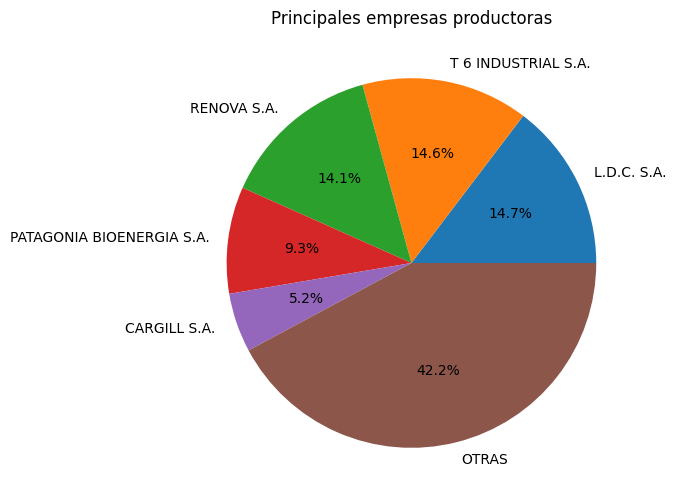

In [25]:
#Gráfico principales empresas productoras:
sizes = [14.66, 14.61, 14.06, 9.34, 5.17, 42.16]
labels = ['L.D.C. S.A.', 'T 6 INDUSTRIAL S.A.', 'RENOVA S.A.', 'PATAGONIA BIOENERGIA S.A.', 'CARGILL S.A. ', 'OTRAS']

plt.figure(figsize=(6, 6))  # Ajusta el tamaño del gráfico
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Principales empresas productoras')
plt.show()

Los valores representados en sizes fueron considerando las producciones totales por empresa dividido el total.

Las 5 empresas mencionadas ocupan el 57,8% de las producciones totales.


In [26]:
#Empresa con mayor producción:
biodiesel_df.iloc[2547]

PERÍODO                                     2017-07-01 00:00:00
PRODUCTORA DE BIODIESEL                             L.D.C. S.A.
LOCALIDAD                                         GENERAL LAGOS
PROVINCIA                                              SANTA FE
CUPO TOTAL ASIGNADO (TN)                                    0.0
PRODUCCIÓN (TN)                                         55405.6
VENTAS AL CORTE (TN)                                        0.0
OTRAS VENTAS (TN)                                           0.0
PRECIO EN $ POR TN DE BIODIESEL                         13195.5
VENTAS EN MILES DE $ POR TN DE BIODIESEL                    0.0
COT. OFICIAL USD                                           17.0
VENTAS EN USD POR TN DE BIODIESEL                           0.0
AXION ENERGY ARGENTINA S.A.                                 0.0
DESTILERÍA ARGENTINA DE PETRÓLEO S.A.                       0.0
PETROBRAS ARGENTINA S.A.                                    0.0
PETROLERA DEL CONOSUR S.A.              

L.D.C. S.A., a su vez, fue la empresa con mayor pico de producción en julio del 2017 con 55.406 tns.


In [27]:
#Top 5 empresas con mayores ventas:
ventas_por_empresa = biodiesel_df.groupby('PRODUCTORA DE BIODIESEL')['VENTAS AL CORTE (TN)'].sum()
ventas_por_empresa_ordenada = ventas_por_empresa.sort_values(ascending=False)
empresas_mayores_ventas = ventas_por_empresa_ordenada.head(5).round(2)
print(empresas_mayores_ventas)

PRODUCTORA DE BIODIESEL
UNITEC BIO S.A.              849125.28
EXPLORA S.A.                 785736.54
DIASER S.A.                  642590.77
PATAGONIA BIOENERGIA S.A.    620479.81
VILUCO S.A.                  564251.77
Name: VENTAS AL CORTE (TN), dtype: float64


Unitec Bio S.A. lidera las ventas en tns de biodiesel. En total vendió 849.125 tns.

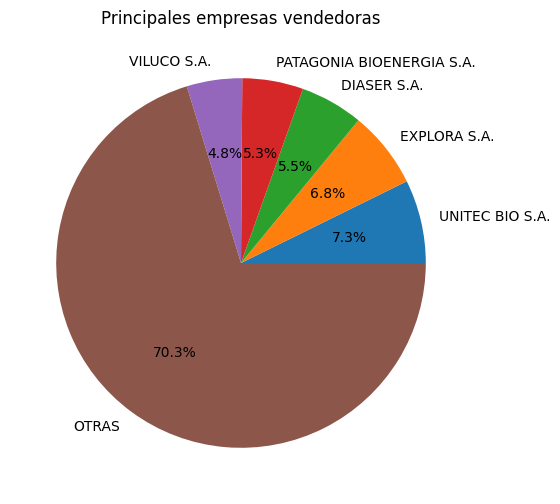

In [28]:
#Gráfico principales empresas vendedoras:
sizes = [7.29, 6.75, 5.52, 5.33, 4.85, 70.26]
labels = ['UNITEC BIO S.A.', 'EXPLORA S.A.', 'DIASER S.A.', 'PATAGONIA BIOENERGIA S.A.', 'VILUCO S.A.', 'OTRAS']

plt.figure(figsize=(6, 6))  # Ajusta el tamaño del gráfico
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Principales empresas vendedoras')
plt.show()

Como podemos observar, no quiere decir que aquellas empresas que más producieron son, a su vez, aquellas que más vendieron.

Respecto al top 5 anterior, solo repite "Patagonia Bioenergia S.A.".

En este caso, el top 5 solo representan el 29,70% del total, por lo que vemos que las ventas se encuentran distribuidas.

In [29]:
#Empresa con mayor venta en tns:
biodiesel_df.iloc[3536]

PERÍODO                                     2019-11-01 00:00:00
PRODUCTORA DE BIODIESEL                            CARGILL S.A.
LOCALIDAD                                               ROSARIO
PROVINCIA                                              SANTA FE
CUPO TOTAL ASIGNADO (TN)                                    0.0
PRODUCCIÓN (TN)                                         9803.75
VENTAS AL CORTE (TN)                                    14512.0
OTRAS VENTAS (TN)                                        256.24
PRECIO EN $ POR TN DE BIODIESEL                         38486.0
VENTAS EN MILES DE $ POR TN DE BIODIESEL             558508.832
COT. OFICIAL USD                                           63.5
VENTAS EN USD POR TN DE BIODIESEL                8795414.677165
AXION ENERGY ARGENTINA S.A.                                 0.0
DESTILERÍA ARGENTINA DE PETRÓLEO S.A.                       0.0
PETROBRAS ARGENTINA S.A.                                    0.0
PETROLERA DEL CONOSUR S.A.              

Cargill S.A., por su parte, obtuvo el mayor registro en venta en toneladas con 14.512 en noviembre del 2019.

In [30]:
#Top 5 empresas con mayores ventas facturadas en pesos:
ventas_por_empresa_en_pesos = biodiesel_df.groupby('PRODUCTORA DE BIODIESEL')['VENTAS EN MILES DE $ POR TN DE BIODIESEL'].sum()
ventas_por_empresa_en_pesos_ordenada = ventas_por_empresa_en_pesos.sort_values(ascending=False)
empresas_mayores_ventas_en_pesos = ventas_por_empresa_en_pesos_ordenada.head(5).round(2)
print(empresas_mayores_ventas_en_pesos)

PRODUCTORA DE BIODIESEL
EXPLORA S.A.                 45851402.12
UNITEC BIO S.A.              44063072.68
PATAGONIA BIOENERGIA S.A.    39348203.69
DIASER S.A.                  31423095.57
ENERGÍA RENOVABLE S.A.       30867979.57
Name: VENTAS EN MILES DE $ POR TN DE BIODIESEL, dtype: float64


Explora S.A. lidera la facturación en pesos con $45.851.402.120.

In [31]:
#Venta con mayor facturación en $ por parte de una PYME:
biodiesel_df.iloc[5667]

PERÍODO                                     2024-01-01 00:00:00
PRODUCTORA DE BIODIESEL                            EXPLORA S.A.
LOCALIDAD                                           SAN LORENZO
PROVINCIA                                              SANTA FE
CUPO TOTAL ASIGNADO (TN)                            3642.492733
PRODUCCIÓN (TN)                                          5673.0
VENTAS AL CORTE (TN)                                    5631.01
OTRAS VENTAS (TN)                                        116.78
PRECIO EN $ POR TN DE BIODIESEL                        923590.0
VENTAS EN MILES DE $ POR TN DE BIODIESEL           5200744.5259
COT. OFICIAL USD                                         830.25
VENTAS EN USD POR TN DE BIODIESEL                  6264070.4919
AXION ENERGY ARGENTINA S.A.                             2001.42
DESTILERÍA ARGENTINA DE PETRÓLEO S.A.                       0.0
PETROBRAS ARGENTINA S.A.                                    0.0
PETROLERA DEL CONOSUR S.A.              

Explora S.A. también facturó la mayor venta en pesos en enero del 2024, por un importe de $5.200.744.526.

In [32]:
#Top 5 empresas con mayores ventas facturadas en dólares:
ventas_por_empresa_en_dolares = biodiesel_df.groupby('PRODUCTORA DE BIODIESEL')['VENTAS EN USD POR TN DE BIODIESEL'].sum()
ventas_por_empresa_en_dolares_ordenada = ventas_por_empresa_en_dolares.sort_values(ascending=False)
empresas_mayores_ventas_en_dolares = ventas_por_empresa_en_dolares_ordenada.head(5).round(2)
print(empresas_mayores_ventas_en_dolares)

PRODUCTORA DE BIODIESEL
UNITEC BIO S.A.              7.969260e+08
EXPLORA S.A.                 7.303039e+08
DIASER S.A.                  5.965523e+08
PATAGONIA BIOENERGIA S.A.    5.696476e+08
ROSARIO BIOENERGY S.A.       5.139086e+08
Name: VENTAS EN USD POR TN DE BIODIESEL, dtype: float64


Unitec BIO S.A. fue la empresa que más redito obtuvo en dólares con 796.926.031 usd.

In [33]:
#Mayor venta en dólares estadounidenses <cotización oficial BNA>:
biodiesel_df.iloc[412]

PERÍODO                                     2011-11-01 00:00:00
PRODUCTORA DE BIODIESEL                     T 6 INDUSTRIAL S.A.
LOCALIDAD                                           SAN LORENZO
PROVINCIA                                              SANTA FE
CUPO TOTAL ASIGNADO (TN)                                    0.0
PRODUCCIÓN (TN)                                        25519.06
VENTAS AL CORTE (TN)                                   11508.63
OTRAS VENTAS (TN)                                           0.0
PRECIO EN $ POR TN DE BIODIESEL                         4975.33
VENTAS EN MILES DE $ POR TN DE BIODIESEL           57259.232098
COT. OFICIAL USD                                           4.27
VENTAS EN USD POR TN DE BIODIESEL               13409656.229016
AXION ENERGY ARGENTINA S.A.                                 0.0
DESTILERÍA ARGENTINA DE PETRÓLEO S.A.                       0.0
PETROBRAS ARGENTINA S.A.                                    0.0
PETROLERA DEL CONOSUR S.A.              

T 6 Industrial S.A. obtuvo la mayor venta en ventas en dólares con 13.409.656 usd noviembre del 2011.

Como observamos, si bien la venta más facturada en pesos perteneció a la empresa "Explora S.A.", la más valiosa en dólares norteamericanos fue de "T 6 Industrial S.A.".

In [34]:
#Cuantos litros totales de gasoil se pudieron producir con las ventas de tns de biodiesel:
biodiesel_df['CAP. DE PROD. GASOIL - PETROLERAS (LTS)'].sum()

1695214042.0

En total desde febrero 2010 a febrero 2024, las petroleras con las compras de tns de biodiesel, pudieron producir 1.695.214.042 litros de gasoil.



In [35]:
#Cual es el precio actual de biodiesel por tn en pesos:
biodiesel_df['PRECIO EN $ POR TN DE BIODIESEL'].tail(1)

5730    940334.0
Name: PRECIO EN $ POR TN DE BIODIESEL, dtype: float64

In [36]:
#Cual es el precio en pesos por tn de biodiesel que más se mantuvo en el tiempo:
biodiesel_df['PRECIO EN $ POR TN DE BIODIESEL'].mode()

0    44121.0
Name: PRECIO EN $ POR TN DE BIODIESEL, dtype: float64

<Axes: xlabel='PERÍODO'>

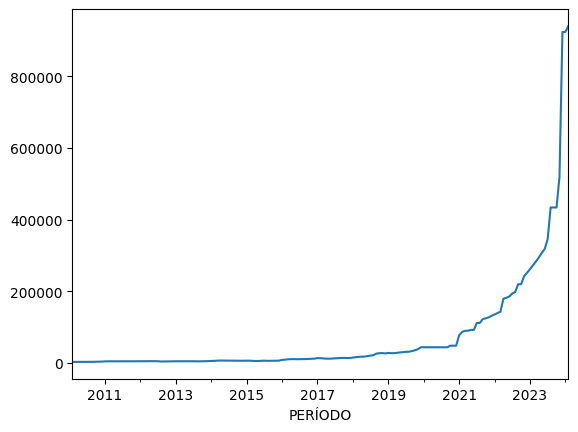

In [37]:
#Evolución del precio del biodiesel por tn en el tiempo:
precio_por_tn = biodiesel_df.groupby(biodiesel_df['PERÍODO'])['PRECIO EN $ POR TN DE BIODIESEL'].mean()
precio_por_tn.plot.line()

<Axes: xlabel='PERÍODO'>

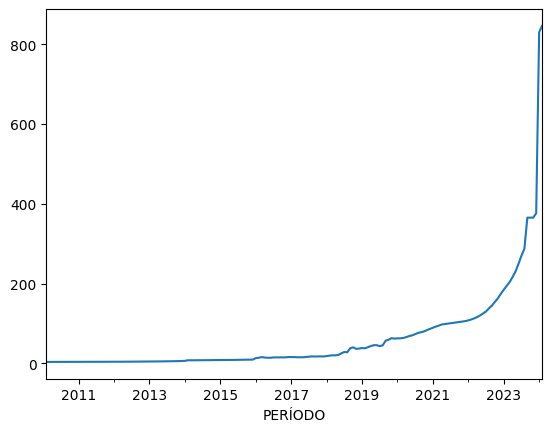

In [38]:
#Evolución de la cotización oficial del dólar en el tiempo:
cotizacion_oficial = biodiesel_df.groupby(biodiesel_df['PERÍODO'])['COT. OFICIAL USD '].mean()
cotizacion_oficial.plot.line()

Las gráficas nos permiten concluir que el precio del biodiesel a lo largo del tiempo ha acompañado la suba del dólar oficial.

In [39]:
#Formato datetime python:
biodiesel_df['PERÍODO'] = pd.to_datetime(biodiesel_df['PERÍODO'])
biodiesel_df['PERÍODO'].describe()

count                             5731
mean     2017-12-10 16:29:13.830047232
min                2010-02-01 00:00:00
25%                2014-09-01 00:00:00
50%                2018-04-01 00:00:00
75%                2021-05-01 00:00:00
max                2024-02-01 00:00:00
Name: PERÍODO, dtype: object

In [40]:
biodiesel_df['PERÍODO'].dt.to_period('M')

0       2010-02
1       2010-02
2       2010-02
3       2010-02
4       2010-02
         ...   
5726    2024-02
5727    2024-02
5728    2024-02
5729    2024-02
5730    2024-02
Name: PERÍODO, Length: 5731, dtype: period[M]

<Axes: xlabel='PERÍODO'>

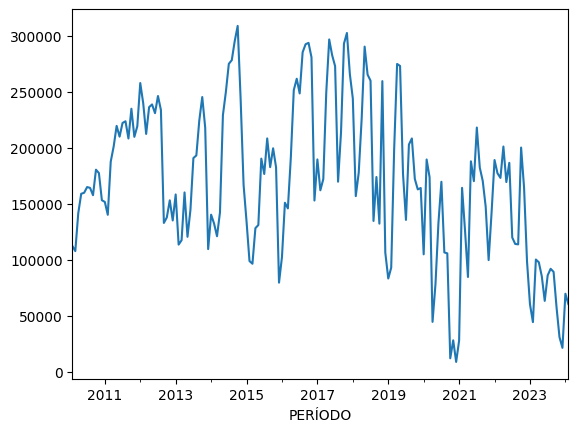

In [41]:
#Gráfico análisis de producción total por año:
produccion_por_año = biodiesel_df.groupby(biodiesel_df['PERÍODO'])['PRODUCCIÓN (TN)'].sum()
produccion_por_año.plot.line()


Text(0, 0.5, 'Producción en tns')

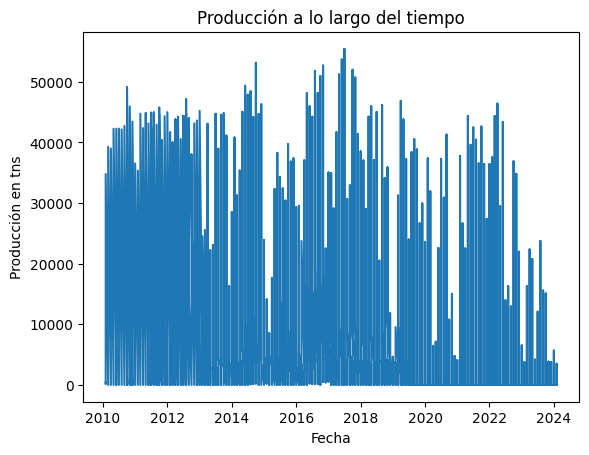

In [42]:
#Gráfico de análisis de producción en tns a lo largo del tiempo:
plt.plot(biodiesel_df['PERÍODO'], biodiesel_df['PRODUCCIÓN (TN)'])
plt.title('Producción a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Producción en tns')

Se observan variaciones irregulares a lo largo del tiempo, sin una tendencia marcada.

Los niveles más altos de producción estuvieron entre el 2014 y 2015, y en el período desde 2016 a 2019.

Por otra parte, los picos más bajos de producción se produjeron en la pandemia en los años 2020 y 2021, como así también se nota un decrecimiento importante a partir del 2022/2023.


<Axes: xlabel='PERÍODO'>

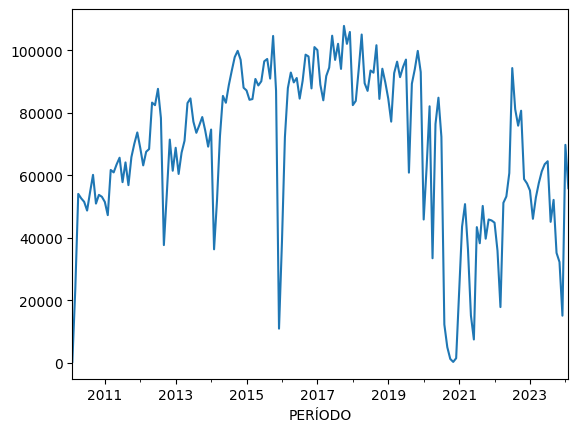

In [43]:
#Gráfico análisis de ventas totales por año:
produccion_por_año = biodiesel_df.groupby(biodiesel_df['PERÍODO'])['VENTAS AL CORTE (TN)'].sum()
produccion_por_año.plot.line()

Text(0, 0.5, 'Ventas en tns')

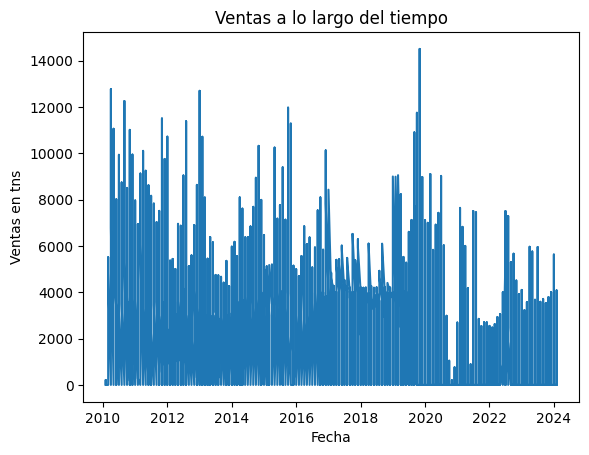

In [44]:
#Gráfico de análisis de ventas en tns a lo largo del tiempo:
plt.plot(biodiesel_df['PERÍODO'], biodiesel_df['VENTAS AL CORTE (TN)'])
plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas en tns')

En cuanto a las ventas, notamos también variaciones irregulares, los picos más altos sucedieron entre 2017 y 2019.

Por su parte, se ven niveles bajos muy marcados cerca del año 2016 y claramente también en pandemia en 2020 y 2021.

Post pandemia, no se identifica una tendencia sino también variaciones irregulares.
